# LIBRARIES

In [4]:
import pandas as pd
import numpy as np

In [5]:
# Data Loading 

data = pd.read_csv('Makaan_Properties_Buy_Dataset.csv',encoding='latin1')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332096 entries, 0 to 332095
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Property_Name             217826 non-null  object 
 1   Property_id               332096 non-null  int64  
 2   Property_type             332096 non-null  object 
 3   Property_status           271654 non-null  object 
 4   Price_per_unit_area       332096 non-null  int64  
 5   Posted_On                 332096 non-null  object 
 6   Project_URL               332096 non-null  object 
 7   builder_id                149978 non-null  float64
 8   Builder_name              149978 non-null  object 
 9   Property_building_status  332096 non-null  object 
 10  City_id                   332096 non-null  int64  
 11  City_name                 332096 non-null  object 
 12  No_of_BHK                 332096 non-null  int64  
 13  Locality_ID               332096 non-null  i

In [7]:
data.head()

,Property_Name,Property_id,Property_type,Property_status,Price_per_unit_area,Posted_On,Project_URL,builder_id,Builder_name,Property_building_status,...,is_furnished,listing_domain_score,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_commercial_Listing,is_PentaHouse,is_studio,Listing_Category
0,Arkiton Luxe,15446514,Apartment,Under Construction,4285,1 day ago,https://www.makaan.com/ahmedabad/arkiton-life-...,100563465.0,Arkiton life Space,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
1,Keshav Akshar Ocean Pearl,15367414,Apartment,Under Construction,7000,2 days ago,https://www.makaan.com/ahmedabad/keshav-naraya...,100009433.0,Keshav Narayan Group,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
2,Vishwa Opulence,14683118,Apartment,Ready to move,5752,2 days ago,https://www.makaan.com/ahmedabad/vishwa-develo...,100207731.0,Vishwa Developers Ahmedabad,ACTIVE,...,Unfurnished,4.0,False,False,True,True,False,False,False,sell
3,Satyam Sarjan,5476295,Apartment,Ready to move,2486,5 days ago,https://www.makaan.com/ahmedabad/satyam-develo...,101303.0,Satyam Developers,ACTIVE,...,Unfurnished,4.0,False,False,True,True,False,False,False,sell
4,Navkar Sunflower,15477040,Apartment,Under Construction,5324,8 days ago,https://www.makaan.com/ahmedabad/navkar-buildc...,1484209.0,Navkar Buildcon Ahmedabad,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell


In [8]:
data.drop(['Property_Name','Property_id','Posted_On','Project_URL','builder_id','Builder_name',
            'City_id','Locality_ID','Longitude','Latitude','Sub_urban_ID','description','listing_domain_score','is_plot',
            'is_PentaHouse','is_studio','Sub_urban_name','is_Apartment','Locality_Name'],axis=1,inplace=True)

In [9]:
data.isnull().sum()/len(data)*100

Property_type                0.000000
Property_status             18.200159
Price_per_unit_area          0.000000
Property_building_status     0.000000
City_name                    0.000000
No_of_BHK                    0.000000
Price                        0.000000
Size                         0.000000
is_furnished                 0.000000
is_RERA_registered           0.000000
is_ready_to_move             0.000000
is_commercial_Listing        0.000000
Listing_Category             0.000000
dtype: float64

In [10]:
data['Property_status'] = data['Property_status'].fillna(data['Property_status'].mode().iloc[0])

In [11]:
data.isnull().sum()

Property_type               0
Property_status             0
Price_per_unit_area         0
Property_building_status    0
City_name                   0
No_of_BHK                   0
Price                       0
Size                        0
is_furnished                0
is_RERA_registered          0
is_ready_to_move            0
is_commercial_Listing       0
Listing_Category            0
dtype: int64

In [12]:
data.head()

,Property_type,Property_status,Price_per_unit_area,Property_building_status,City_name,No_of_BHK,Price,Size,is_furnished,is_RERA_registered,is_ready_to_move,is_commercial_Listing,Listing_Category
0,Apartment,Under Construction,4285,ACTIVE,Ahmedabad,3,7500000,1750,Unfurnished,True,False,False,sell
1,Apartment,Under Construction,7000,ACTIVE,Ahmedabad,4,23688000,3384,Unfurnished,True,False,False,sell
2,Apartment,Ready to move,5752,ACTIVE,Ahmedabad,3,13200840,2295,Unfurnished,False,True,False,sell
3,Apartment,Ready to move,2486,ACTIVE,Ahmedabad,2,2283000,918,Unfurnished,False,True,False,sell
4,Apartment,Under Construction,5324,ACTIVE,Ahmedabad,3,9371000,1760,Unfurnished,True,False,False,sell


In [13]:
# label encoding columns

df = data[['Property_type', 'Property_status', 'Property_building_status', 'City_name', 'is_furnished',
        'is_RERA_registered', 'is_ready_to_move', 'is_commercial_Listing', 'Listing_Category']]

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le

LabelEncoder()

In [15]:


for i in df:
    data[i]=le.fit_transform(data[i])
    

#for i,le in labelencoders.items():
    #print(f"\nmapping for '{i}:")
    #for class_index, class_labels  in enumerate(le.classes_):
     #   print(f"   {class_labels} → {class_index}")
    
    

In [16]:
df

,Property_type,Property_status,Property_building_status,City_name,is_furnished,is_RERA_registered,is_ready_to_move,is_commercial_Listing,Listing_Category
0,Apartment,Under Construction,ACTIVE,Ahmedabad,Unfurnished,True,False,False,sell
1,Apartment,Under Construction,ACTIVE,Ahmedabad,Unfurnished,True,False,False,sell
2,Apartment,Ready to move,ACTIVE,Ahmedabad,Unfurnished,False,True,False,sell
3,Apartment,Ready to move,ACTIVE,Ahmedabad,Unfurnished,False,True,False,sell
4,Apartment,Under Construction,ACTIVE,Ahmedabad,Unfurnished,True,False,False,sell
...,...,...,...,...,...,...,...,...,...
332091,Apartment,Under Construction,ACTIVE,Mumbai,Unfurnished,True,False,False,sell
332092,Apartment,Under Construction,ACTIVE,Mumbai,Unfurnished,True,False,False,sell
332093,Apartment,Under Construction,ACTIVE,Mumbai,Unfurnished,True,False,False,sell
332094,Apartment,Under Construction,ACTIVE,Mumbai,Unfurnished,True,False,False,sell


In [17]:
numeric_columns = data[['Price_per_unit_area','No_of_BHK','Price']]

|| Price_per_unit_area ||


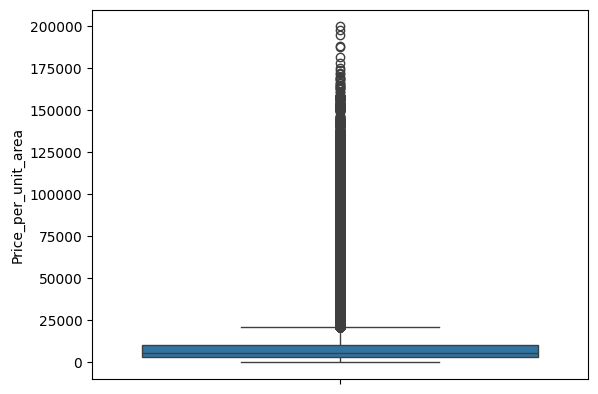

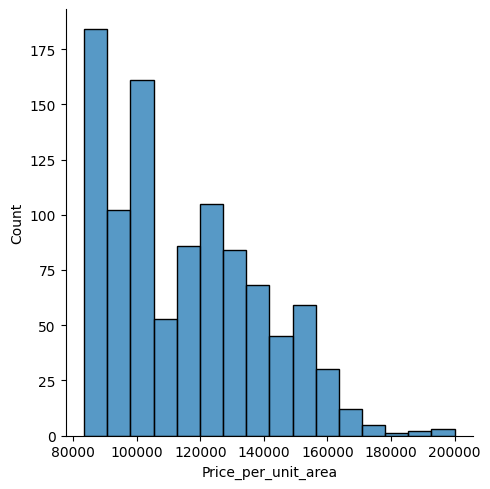

|| No_of_BHK ||


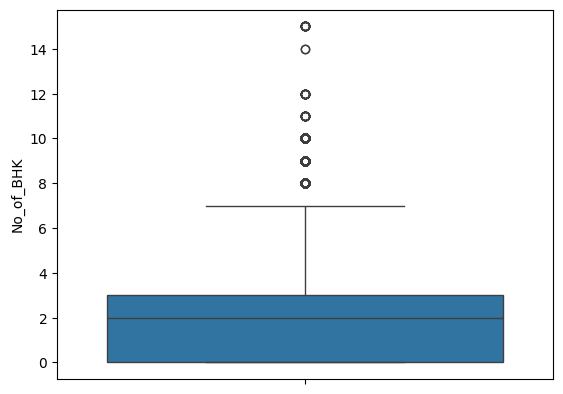

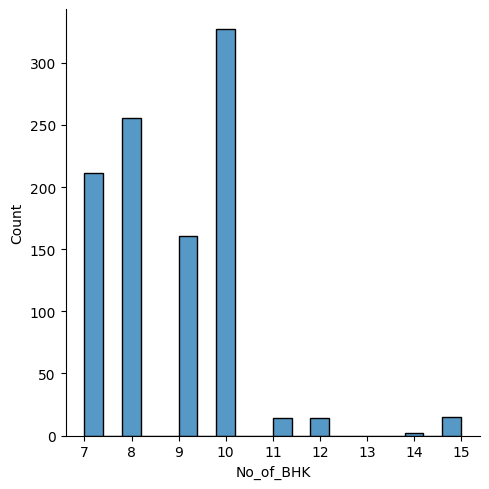

|| Price ||


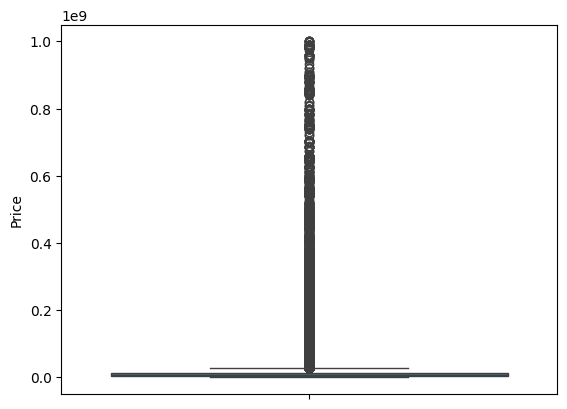

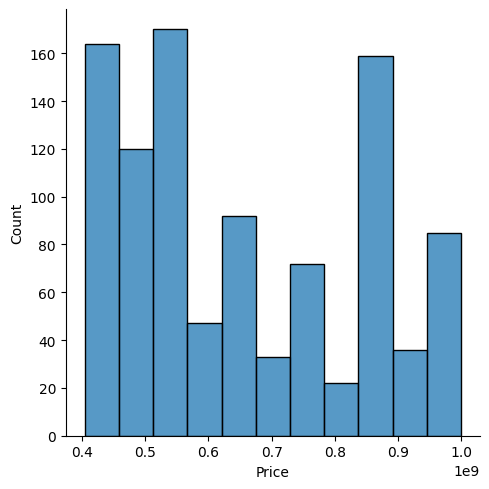

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in numeric_columns:
    print("||",i,"||")
    sns.boxplot(data[i])
    sns.displot(data[i].nlargest(1000))
    plt.show()
    

|| Property_type ||


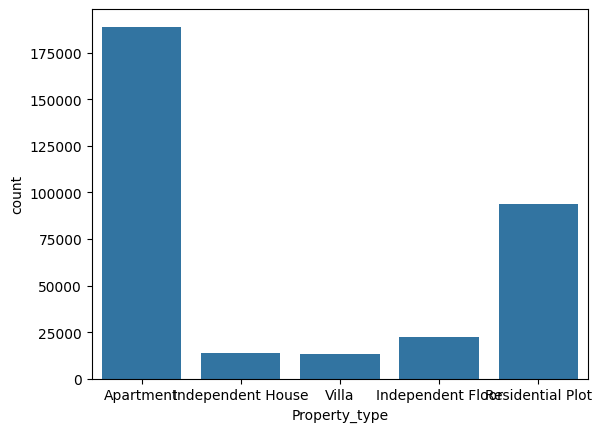

|| Property_status ||


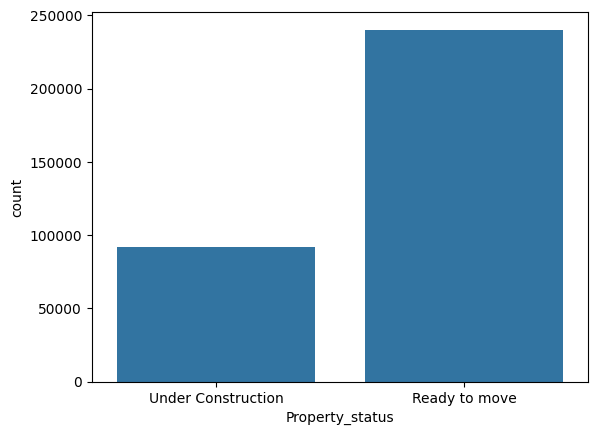

|| Property_building_status ||


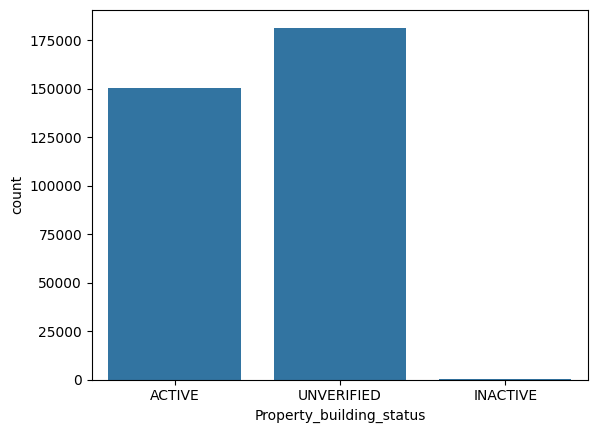

|| City_name ||


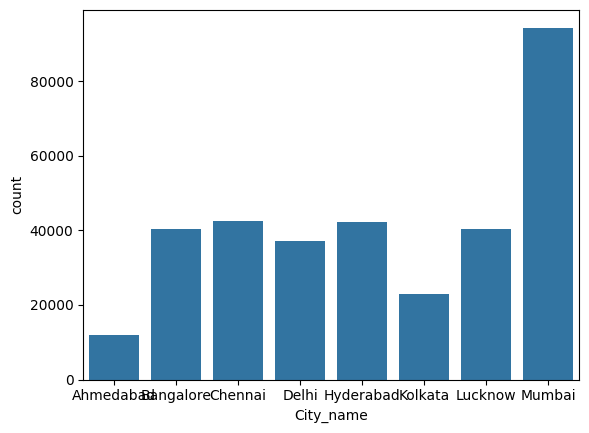

|| is_furnished ||


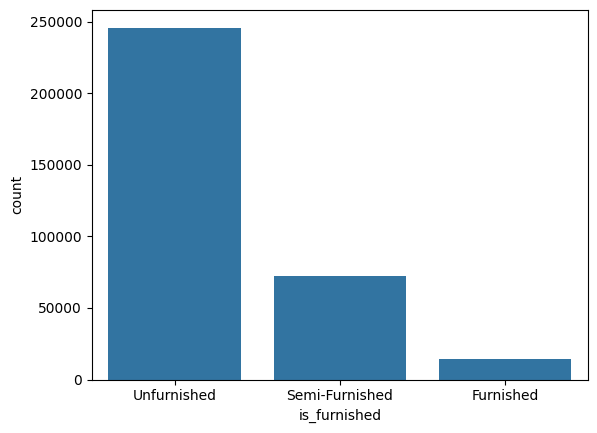

|| is_RERA_registered ||


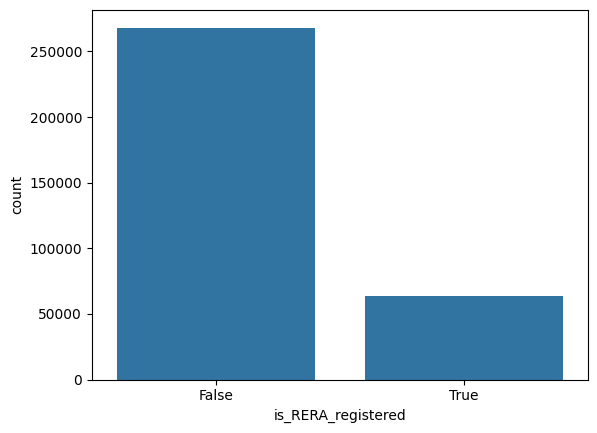

|| is_ready_to_move ||


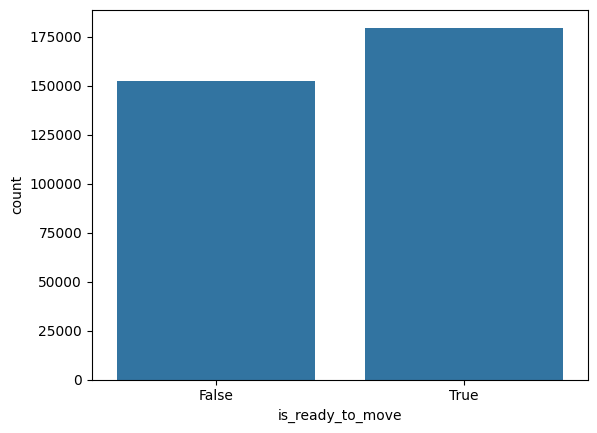

|| is_commercial_Listing ||


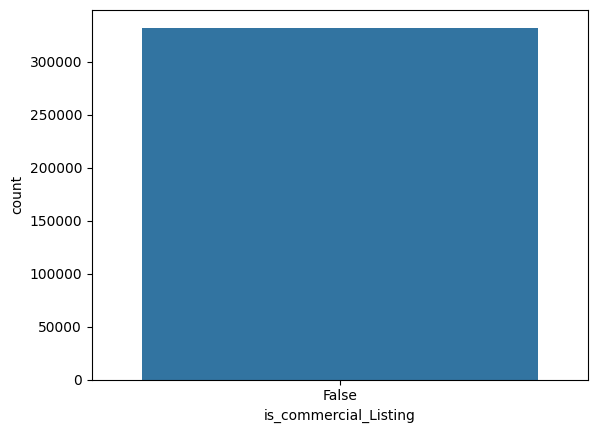

|| Listing_Category ||


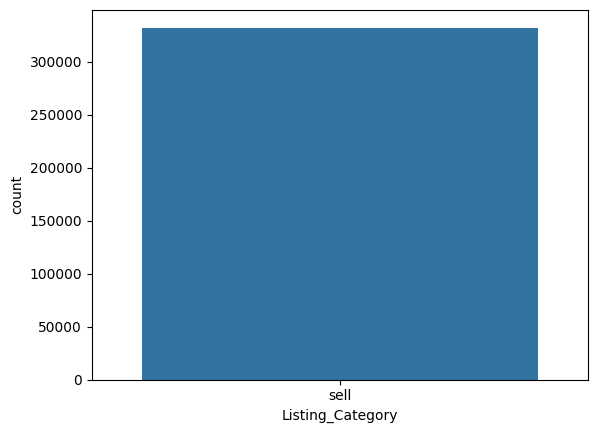

In [19]:
for i in df:
    print("||",i,"||")
    sns.countplot(x=i,data=df)
    plt.show()

In [20]:
# remove not effective columns

df.drop(['Listing_Category','is_commercial_Listing'],axis=1,inplace=True)

C:\Users\mmuha\AppData\Local\Temp\ipykernel_19924\3470323954.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Listing_Category','is_commercial_Listing'],axis=1,inplace=True)


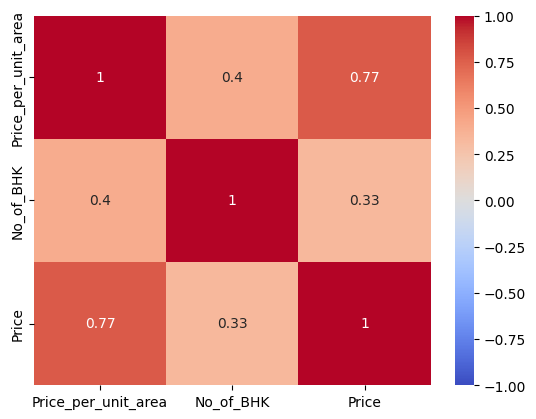

In [21]:
# correlation heatmap

sns.heatmap(numeric_columns.corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm')
plt.show()

In [22]:
df.isnull().sum()/len(df)*100

Property_type               0.0
Property_status             0.0
Property_building_status    0.0
City_name                   0.0
is_furnished                0.0
is_RERA_registered          0.0
is_ready_to_move            0.0
dtype: float64

In [23]:
x = data.drop(['Price'],axis=1)
y = data['Price']

In [24]:
data

,Property_type,Property_status,Price_per_unit_area,Property_building_status,City_name,No_of_BHK,Price,Size,is_furnished,is_RERA_registered,is_ready_to_move,is_commercial_Listing,Listing_Category
0,0,1,4285,0,0,3,7500000,1750,2,1,0,0,0
1,0,1,7000,0,0,4,23688000,3384,2,1,0,0,0
2,0,0,5752,0,0,3,13200840,2295,2,0,1,0,0
3,0,0,2486,0,0,2,2283000,918,2,0,1,0,0
4,0,1,5324,0,0,3,9371000,1760,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
332091,0,1,9826,0,7,1,3400000,346,2,1,0,0,0
332092,0,1,8568,0,7,1,3650000,426,2,1,0,0,0
332093,0,1,9861,0,7,1,3550000,360,2,1,0,0,0
332094,0,1,8813,0,7,2,5200000,590,2,1,0,0,0


In [25]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss = ss.fit_transform(x)

In [26]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [27]:
x_train.shape

(265676, 12)

In [28]:
x_test.shape

(66420, 12)

In [29]:
from sklearn.linear_model import LinearRegression

model_regres = LinearRegression()


In [30]:
model_regres.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [31]:
y_pred_train = model_regres.predict(x_train)
y_pred_test = model_regres.predict(x_test)

In [32]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score


mse = mean_squared_error(y_test,y_pred_test)
r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = mse ** 0.5

print(f"r2_train : {r2_train}")
print(f"r2_test : {r2_test}")
print(f"mse : {mse}")
print(f"mae : {mae}")
print(f"rmse : {rmse}")


r2_train : 0.681481802736341
r2_test : 0.7002813224292196
mse : 609356062962861.6
mae : 12436488.577965364
rmse : 24685138.50402427


In [33]:
from sklearn.linear_model import LassoCV , RidgeCV , ElasticNetCV

In [34]:
lasso = LassoCV(alphas=[0.01,0.1,1.0,10,100],cv=5)
lasso.fit(x_train,y_train)
lasso

,eps,0.001
,n_alphas,'deprecated'
,alphas,"[0.01, 0.1, ...]"
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


In [35]:
ridge = RidgeCV(alphas=[0.01,0.1,1.0,10,100],cv=5)
ridge.fit(x_train,y_train)
ridge

C:\Users\mmuha\AppData\Roaming\Python\Python312\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.10035e-16): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


,alphas,"[0.01, 0.1, ...]"
,fit_intercept,True
,scoring,None
,cv,5
,gcv_mode,None
,store_cv_results,False
,alpha_per_target,False


In [36]:
elastic = ElasticNetCV(cv=5, l1_ratio=[0.1,0.3,0.5,0.7,0.9,1])
elastic.fit(x_train,y_train)
elastic

,l1_ratio,"[0.1, 0.3, ...]"
,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,cv,5
,copy_X,True
,verbose,0


In [37]:
lasso_pred_train = lasso.predict(x_train)
lasso_pred_test = lasso.predict(x_test)

In [38]:
mse_lasso = mean_squared_error(y_test,lasso_pred_test)
r2_train_lasso = r2_score(y_train,lasso_pred_train)
r2_test_lasso = r2_score(y_test,lasso_pred_test)
mae_lasso = mean_absolute_error(y_test,lasso_pred_test)
rmse_lasso = mse ** 0.5

print(f"r2_train : {r2_train}")
print(f"r2_test : {r2_test}")
print(f"mse : {mse}")
print(f"mae : {mae}")
print(f"rmse : {rmse}")


r2_train : 0.681481802736341
r2_test : 0.7002813224292196
mse : 609356062962861.6
mae : 12436488.577965364
rmse : 24685138.50402427


In [39]:
ridge_pred_train = ridge.predict(x_train)
ridge_pred_test = ridge.predict(x_test)

In [ ]:
r2_train_lasso = r2_score(y_train,ridge_pred_train)
r2_test_lasso = r2_score(y_test,ridge_pred_test)
mse_lasso = mean_squared_error(y_test,ridge_pred_test)
mae_lasso = mean_absolute_error(y_test,ridge_pred_test)


print(f"r2_train : {r2_train}")
print(f"r2_test : {r2_test}")
print(f"mse : {mse}")
print(f"mae : {mae}")

r2_train : 0.681481802736341
r2_test : 0.7002813224292196
mse : 609356062962861.6
mae : 12436488.577965364


In [41]:
elastic_pred_train = elastic.predict(x_train)
elastic_pred_test = elastic.predict(x_test)

In [63]:
r2_pred_train = r2_score(y_train,elastic_pred_train)
r2_pred_test = r2_score(y_test,elastic_pred_test)

print(f"r2_pred_train : {r2_pred_train}")
print(f"r2_pred_test : {r2_pred_test}")

r2_pred_train : 0.5872308538511035
r2_pred_test : 0.6056135279518606


In [43]:
# Decision Tree

from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [ ]:
decision_pred_train = model.predict(x_train)
decision_pred_test = model.predict(x_test)

In [65]:
r2_pred_train = r2_score(y_train,decision_pred_train)
r2_pred_test = r2_score(y_test,decision_pred_test)
mse = mean_squared_error(y_test,ridge_pred_test)
mae = mean_absolute_error(y_test,ridge_pred_test)

print(f"r2_pred_train : {r2_pred_train}")
print(f"r2_pred_test : {r2_pred_test}")
print(f"mse : {mse}")
print(f"mse : {mae}")



r2_pred_train : 0.9999993859526984
r2_pred_test : 0.9920470140440718
mse : 609356061320860.2
mse : 12436488.394440176


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Randomforest for regression

rf = RandomForestRegressor()
rf.fit(x_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [47]:
rf_pred_train =  rf.predict(x_train)
rf_pred_test = rf.predict(x_test)



In [67]:
r2_pred_train = r2_score(y_train,rf_pred_train)
r2_pred_test = r2_score(y_test,rf_pred_test)
mse_lasso = mean_squared_error(y_test,rf_pred_test)
mae_lasso = mean_absolute_error(y_test,rf_pred_test)

print(f"r2_pred_train : {r2_pred_train}")
print(f"r2_pred_test : {r2_pred_test}")
print(f"mse : {mse}")
print(f"mae : {mae}")

r2_pred_train : 0.9996803826498843
r2_pred_test : 0.9969631021342821
mse : 609356061320860.2
mae : 12436488.394440176


In [ ]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Xgboost for better accuracy
# lightgbm for better accuracy

In [50]:
xg = XGBRegressor()
xg.fit(x_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [51]:
lgb = LGBMRegressor()
lgb.fit(x_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006829 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 549
[LightGBM] [Info] Number of data points in the train set: 265676, number of used features: 10
[LightGBM] [Info] Start training from score 15423817.246165


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [52]:
xgb_pred_train = xg.predict(x_train)
xgb_pred_test = xg.predict(x_test)

In [68]:
r2_pred_train = r2_score(y_train,xgb_pred_train)
r2_pred_test = r2_score(y_test,xgb_pred_test)
mse_lasso = mean_squared_error(y_test,xgb_pred_test)
mae_lasso = mean_absolute_error(y_test,xgb_pred_test)

print(f"r2_pred_train : {r2_pred_train}")
print(f"r2_pred_test : {r2_pred_test}")
print(f"mse : {mse}")
print(f"mae : {mae}")


r2_pred_train : 0.9729865193367004
r2_pred_test : 0.9597333073616028
mse : 609356061320860.2
mae : 12436488.394440176


In [54]:
lgb_pred_train = lgb.predict(x_train)
lgb_pred_test = lgb.predict(x_test)


In [69]:
r2_train_lgb = r2_score(y_train,lgb_pred_train)
r2_test_lgb = r2_score(y_test,lgb_pred_test)
mse_lasso = mean_squared_error(y_test,xgb_pred_test)
mae_lasso = mean_absolute_error(y_test,xgb_pred_test)

print(f"r2_train : {r2_train_lgb}")
print(f"r2_test : {r2_test_lgb}")
print(f"mse : {mse}")
print(f"mae : {mae}")

r2_train : 0.9778371738232822
r2_test : 0.9764505432097924
mse : 609356061320860.2
mae : 12436488.394440176


In [ ]:
Property_type = int(input('Select Property Type [Apartment = 0 \nIndependent Floor = 1 \nIndependent House = 2 \nResidential Plot = 3 \nVilla = 4] : '))
Property_status = int(input('Select Property Status [Ready to move = 0 \nUnder Construction = 1] : '))
Price_per_unit_area = float(input('Enter Price per unit area : '))
Property_building_status = int(input('Select Property building status [ACTIVE = 0 \nINACTIVE = 1 \nUNVERIFIED = 2] : '))
City_name = int(input('Select City [Ahmedabad = 0 \nBangalore = 1 \nChennai = 2 \nDelhi = 3 \nHyderabad = 4 \nKolkata = 5 \nLucknow = 6 \nMumbai = 7] : '))
No_of_BHK = int(input('Enter Number of BHK : '))
Size = float(input('Enter Size : '))
is_furnished = int(input('Is Furnished [Furnished = 0 \nSemi-Furnished = 1 \nUnfurnished = 2] :'))
is_RERA_registered = int(input('Is RERA Registered [False = 0 \nTrue = 1] : '))
is_ready_to_move = int(input('Is Ready to Move [False = 0 \nTrue = 1] : '))

user_input = np.array([Property_type,Property_status,Price_per_unit_area,Property_building_status,City_name,No_of_BHK,Size,is_furnished,is_RERA_registered,is_ready_to_move]).reshape(1,-1)

user_scaled = ss.transform(user_input)
output = lg.predict(user_scaled)

print(f'The Price is RS {output[0]}')